## Imports

In [1]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import time
import math
import numpy as np

## Estudo dos dados

## Visualização dos dados

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

Informação relativa ao data set, nomeadamente análise de possíveis dados em falta, tipo de dados, número e nome das colunas (features) e número de registos.

In [3]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Visualização dos registos (da cabeça e cauda) e colunas do data set.

In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**Observação:** Após a visualização da cabeça e cauda do data set proposto, é visível a presença de features que contêm em determinados registos valores em falta e/ou valores incoerentes.

### Outliers

#### Feature "age"

<AxesSubplot:>

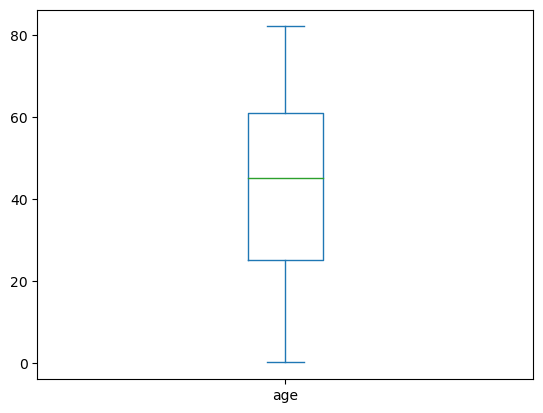

In [6]:
dataset["age"].plot.box()

#### Feature "avg_glucose_level"

<AxesSubplot:>

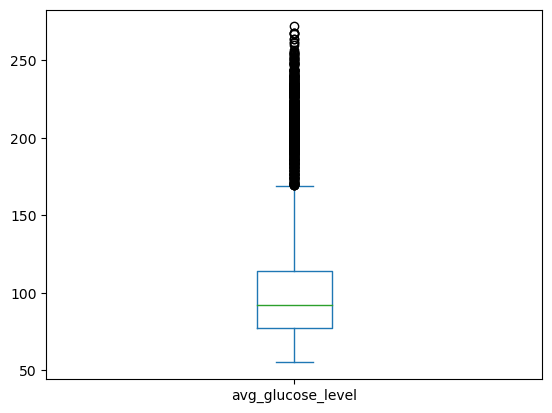

In [7]:
dataset["avg_glucose_level"].plot.box()

#### Feature "bmi"

<AxesSubplot:>

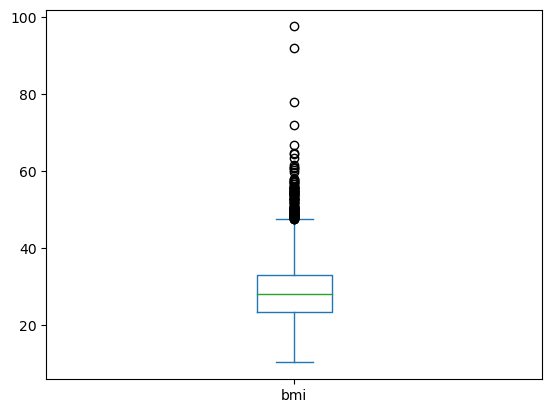

In [8]:
dataset["bmi"].plot.box()

### Missing Values

In [9]:
dataset.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

<AxesSubplot:>

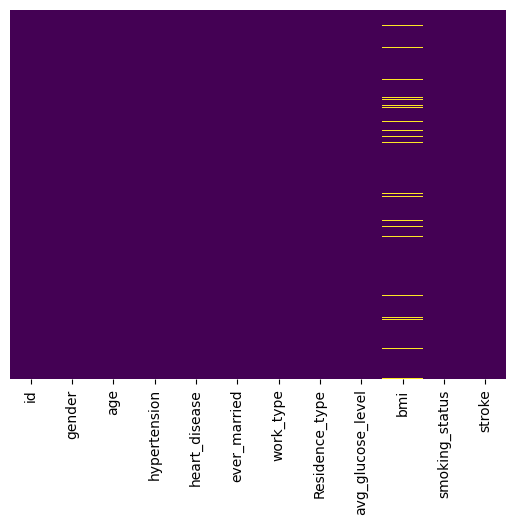

In [10]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Valores duplicados

In [11]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

### Análise do tipo de valores para uma dada feature

#### Feature "stroke"

In [12]:
dataset['stroke'].value_counts(ascending=True)

1     249
0    4861
Name: stroke, dtype: int64

In [13]:
dataset['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [14]:
dataset['stroke'].describe()

count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

#### Feature "gender"

In [15]:
dataset['gender'].value_counts(ascending=True)

Other        1
Male      2115
Female    2994
Name: gender, dtype: int64

In [16]:
dataset['gender'].value_counts(normalize=True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [17]:
dataset['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

#### Feature "ever_married"

In [18]:
dataset['ever_married'].value_counts(ascending=True)

No     1757
Yes    3353
Name: ever_married, dtype: int64

In [19]:
dataset['ever_married'].value_counts(normalize=True)

Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

In [20]:
dataset['ever_married'].describe()

count     5110
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object

#### Feature "work_type"

In [21]:
dataset['work_type'].value_counts(ascending=True)

Never_worked       22
Govt_job          657
children          687
Self-employed     819
Private          2925
Name: work_type, dtype: int64

In [22]:
dataset['work_type'].value_counts(normalize=True)

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

In [23]:
dataset['work_type'].describe()

count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object

#### Feature "Residence_type"

In [24]:
dataset['Residence_type'].value_counts(ascending=True)

Rural    2514
Urban    2596
Name: Residence_type, dtype: int64

In [25]:
dataset['Residence_type'].value_counts(normalize=True)

Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64

In [26]:
dataset['Residence_type'].describe()

count      5110
unique        2
top       Urban
freq       2596
Name: Residence_type, dtype: object

#### Feature "smoking_status"

In [27]:
dataset['smoking_status'].value_counts(normalize=True)

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

In [28]:
dataset['smoking_status'].value_counts(normalize=True)

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

In [29]:
dataset['smoking_status'].describe()

count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

### Análise da tendência central dos dados

In [30]:
dataset[["age", "avg_glucose_level", "bmi"]].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


### Análise da dispersão estatística dos dados

<AxesSubplot:xlabel='bmi', ylabel='Count'>

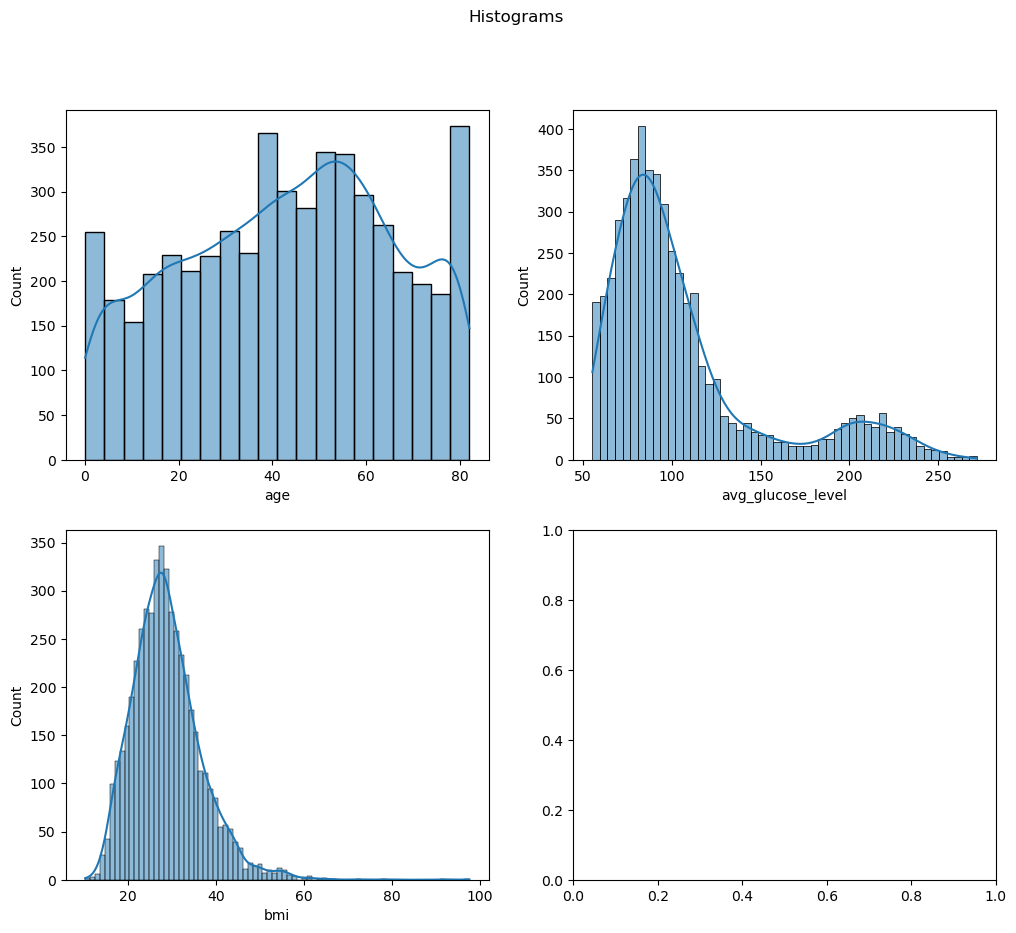

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms')

sns.histplot(dataset['age'], ax=axs[0, 0], kde=True)
sns.histplot(dataset['avg_glucose_level'], ax=axs[0, 1], kde=True)
sns.histplot(dataset['bmi'], ax=axs[1, 0], kde=True)

## Tratamento e Preparação dos dados

### Eliminação de features

In [32]:
dataset = dataset.drop(columns=["id"])
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Tratamento de valores em falta

In [33]:
dataset["bmi"].interpolate(method = 'linear', inplace=True)
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,29.30,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


### Normalização dos dados

In [34]:
columns = {"avg_glucose_level", "bmi"}

for column in columns:
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())         
        
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,0.277778,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,0.132167,0.217640,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,0.323516,0.340206,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,0.128658,0.232532,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,0.513203,0.175258,formerly smoked,0


### Nominal Value Discretization

#### Label Encoding

In [35]:
# scale_mapper2 = {"Male": 1, "Female": 2, "Other": 3}
# dataset["gender"] = dataset["gender"].replace(scale_mapper2)

scale_mapper3 = {"Yes": 1, "No": 2}
dataset["ever_married"] = dataset["ever_married"].replace(scale_mapper3)

# scale_mapper4 = {"Private": 1, "Self-employed": 2, "children": 3, "Govt_job": 4, "Never_worked": 5}
# dataset["work_type"] = dataset["work_type"].replace(scale_mapper4)

scale_mapper5 = {"Urban": 1, "Rural": 2}
dataset["Residence_type"] = dataset["Residence_type"].replace(scale_mapper5)

# scale_mapper6 = {"formerly smoked": 1, "never smoked": 2, "smokes": 3, "Unknown": 4}
# dataset["smoking_status"] = dataset["smoking_status"].replace(scale_mapper6)

dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,0.801265,0.301260,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,2,0.679023,0.277778,never smoked,1
2,Male,80.0,0,1,1,Private,2,0.234512,0.254296,never smoked,1
3,Female,49.0,0,0,1,Private,1,0.536008,0.276060,smokes,1
4,Female,79.0,1,0,1,Self-employed,2,0.549349,0.156930,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,1,0.132167,0.217640,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,1,0.323516,0.340206,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,2,0.128658,0.232532,never smoked,0
5108,Male,51.0,0,0,1,Private,2,0.513203,0.175258,formerly smoked,0


#### One-hot Encoding

In [36]:
dataset = dataset.copy()

dummies = pd.get_dummies(dataset['gender'], prefix='gender')
dataset = pd.concat([dataset, dummies], axis=1)
dataset = dataset.drop('gender', axis=1)

dummies = pd.get_dummies(dataset['work_type'], prefix='work_type')
dataset = pd.concat([dataset, dummies], axis=1)
dataset = dataset.drop('work_type', axis=1)

dummies = pd.get_dummies(dataset['smoking_status'], prefix='smoking_status')
dataset = pd.concat([dataset, dummies], axis=1)
dataset = dataset.drop('smoking_status', axis=1)

dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,0.801265,0.301260,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,2,0.679023,0.277778,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,2,0.234512,0.254296,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,0.536008,0.276060,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,2,0.549349,0.156930,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,0.132167,0.217640,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,0.323516,0.340206,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,2,0.128658,0.232532,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,2,0.513203,0.175258,0,0,1,0,0,0,1,0,0,0,1,0,0


### Correlação entre features

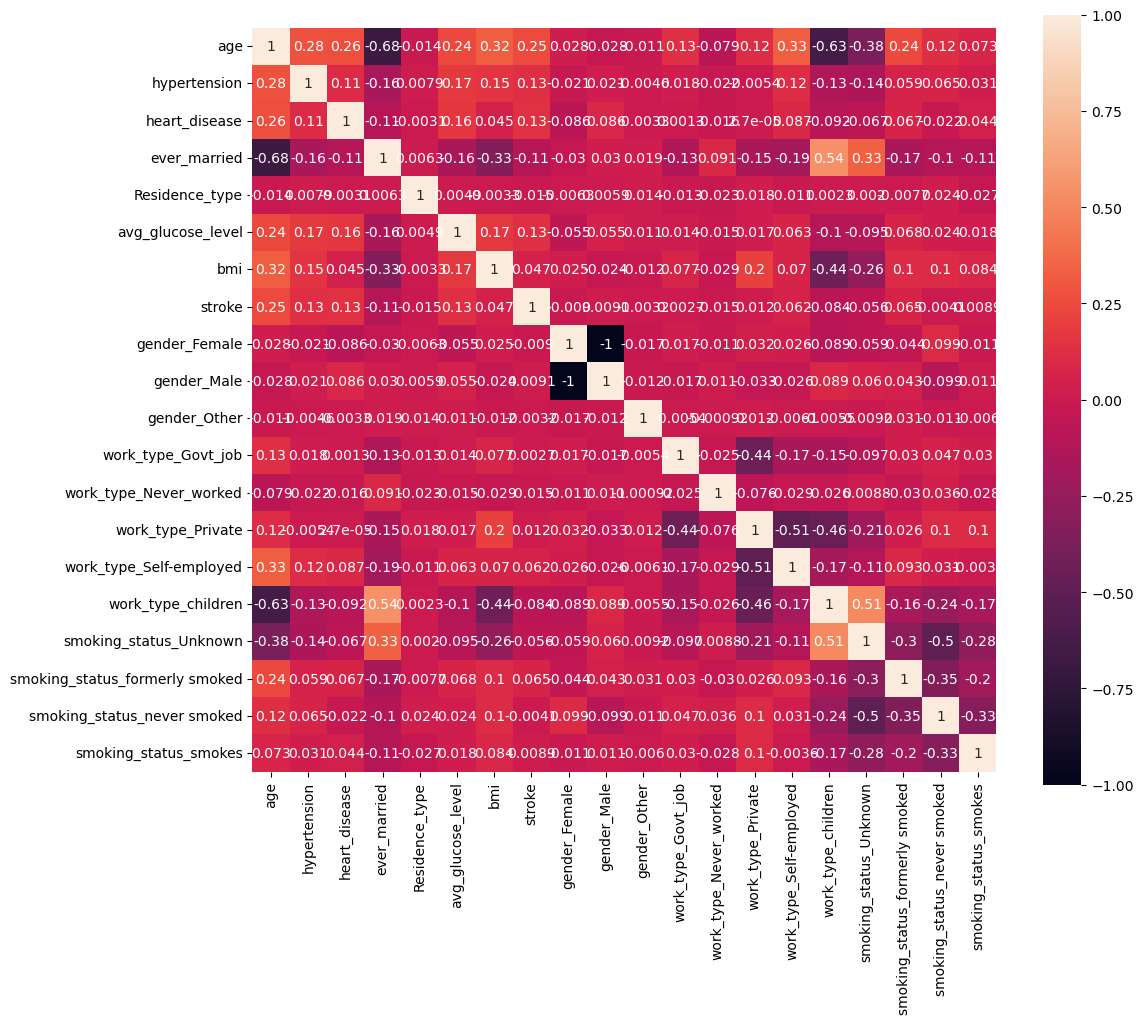

In [37]:
corr_matrix = dataset.corr()
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

## Modelos

### Separação do dataset para treino

In [38]:
X = dataset.drop(['stroke'], axis=1)
y = dataset['stroke']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Balanceamento do dataset de treino

In [40]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Treinamento dos modelos

In [41]:
modelos = {
    "Regressão Logística": LogisticRegression(random_state=2022, max_iter=1000),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=2022),
    "Máquina de Vetores de Suporte (Linear)": LinearSVC(random_state=2022, dual=False),
    "Máquina de Vetores de Suporte (Não linear)": SVC(random_state=2022),
    "Rede Neural Artificial (MLP)": MLPClassifier(random_state=2022, hidden_layer_sizes=(8), activation='identity', solver='adam', max_iter=1000),
    "Floresta Aleatória": RandomForestClassifier(random_state=2022),
}

In [42]:
def treinar_modelos(X_train, y_train):
    for nome, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        print(nome + " treinado.")
        
treinar_modelos(X_train, y_train)

Regressão Logística treinado.
Árvore de Decisão treinado.
Máquina de Vetores de Suporte (Linear) treinado.
Máquina de Vetores de Suporte (Não linear) treinado.
Rede Neural Artificial (MLP) treinado.
Floresta Aleatória treinado.


In [43]:
def print_resultados():
    print("Resultados\n-----------------")
    print(f'null accuracy = {round(max(y_test.mean(), 1 - y_test.mean()), 2)}')
    for nome, modelo in modelos.items():
        y_pred = modelo.predict(X_test)
        print(
            "\n" + nome + ":\nAccuracy: {:.3f}%\nF1 Score: {:.5f}"\
            .format(accuracy_score(y_test, y_pred) * 100, f1_score(y_test, y_pred))
        )
    
print_resultados()

Resultados
-----------------
null accuracy = 0.95

Regressão Logística:
Accuracy: 95.499%
F1 Score: 0.00000

Árvore de Decisão:
Accuracy: 90.802%
F1 Score: 0.13497

Máquina de Vetores de Suporte (Linear):
Accuracy: 95.499%
F1 Score: 0.00000

Máquina de Vetores de Suporte (Não linear):
Accuracy: 95.499%
F1 Score: 0.00000

Rede Neural Artificial (MLP):
Accuracy: 95.564%
F1 Score: 0.02857

Floresta Aleatória:
Accuracy: 95.369%
F1 Score: 0.00000


### Modelos com treinamento balanceado (RandomOverSampler)

In [44]:
treinar_modelos(X_train_ros, y_train_ros)

Regressão Logística treinado.
Árvore de Decisão treinado.
Máquina de Vetores de Suporte (Linear) treinado.
Máquina de Vetores de Suporte (Não linear) treinado.
Rede Neural Artificial (MLP) treinado.
Floresta Aleatória treinado.


In [45]:
print_resultados()

Resultados
-----------------
null accuracy = 0.95

Regressão Logística:
Accuracy: 71.298%
F1 Score: 0.21147

Árvore de Decisão:
Accuracy: 91.781%
F1 Score: 0.14865

Máquina de Vetores de Suporte (Linear):
Accuracy: 70.581%
F1 Score: 0.21016

Máquina de Vetores de Suporte (Não linear):
Accuracy: 63.796%
F1 Score: 0.18262

Rede Neural Artificial (MLP):
Accuracy: 74.886%
F1 Score: 0.23154

Floresta Aleatória:
Accuracy: 94.912%
F1 Score: 0.07143


### Modelos com treinamento balanceado (SMOTE)

In [46]:
treinar_modelos(X_train_smote, y_train_smote)

Regressão Logística treinado.
Árvore de Decisão treinado.
Máquina de Vetores de Suporte (Linear) treinado.
Máquina de Vetores de Suporte (Não linear) treinado.
Rede Neural Artificial (MLP) treinado.
Floresta Aleatória treinado.


In [47]:
print_resultados()

Resultados
-----------------
null accuracy = 0.95

Regressão Logística:
Accuracy: 88.976%
F1 Score: 0.19905

Árvore de Decisão:
Accuracy: 88.780%
F1 Score: 0.13131

Máquina de Vetores de Suporte (Linear):
Accuracy: 88.780%
F1 Score: 0.18868

Máquina de Vetores de Suporte (Não linear):
Accuracy: 66.471%
F1 Score: 0.19182

Rede Neural Artificial (MLP):
Accuracy: 88.128%
F1 Score: 0.20175

Floresta Aleatória:
Accuracy: 92.368%
F1 Score: 0.13333
